In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns

# Dataset choice

## Dataset 1

In [14]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/first_approach/with_mask dataset/first_approach/tina_detections/with_mask.json

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [15]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/first_approach/without_mask dataset/first_approach/tina_detections/without_mask.json

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [16]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/first_approach/incorrect_mask dataset/first_approach/tina_detections/incorrect_mask.json

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


In [17]:
import json
with open("dataset/first_approach/tina_detections/with_mask.json") as file:
    mask_face = json.load(file)

with open("dataset/first_approach/tina_detections/without_mask.json") as file:
    nonmask_face = json.load(file)

with open("dataset/first_approach/tina_detections/incorrect_mask.json") as file:
    incorrect_face = json.load(file)    

In [36]:
many_faces = []
faces_count = []
lots_faces = []
for cat in [mask_face, nonmask_face, incorrect_face]:
    for i in range(len(cat)):
        img = cat[str(i)]
        faces_no = len(img["objects"])
        faces_count.append(faces_no)
        if faces_no > 1:
            many_faces.append(img["filename"])
            if faces_no >= 4:
                lots_faces.append(img["filename"])

In [32]:
sns.set(font_scale=1.0)

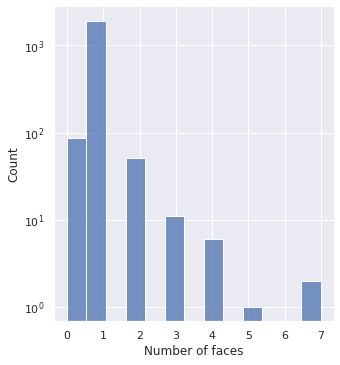

In [35]:
fig = sns.displot(faces_count)
for ax in fig.axes.flat:
    ax.set_yscale('log')
    ax.set(xlabel='Number of faces')
fig

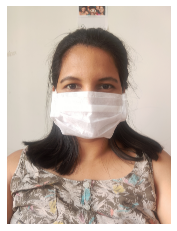

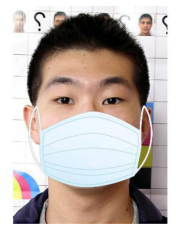

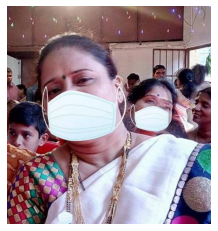

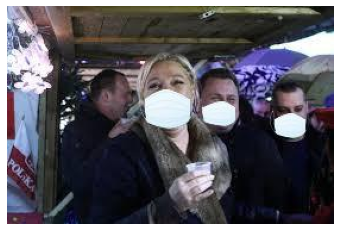

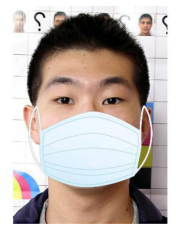

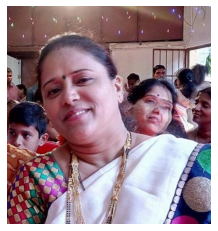

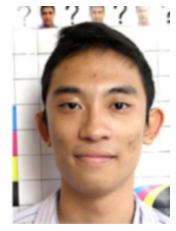

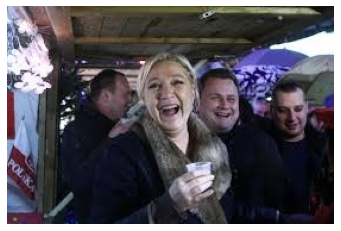

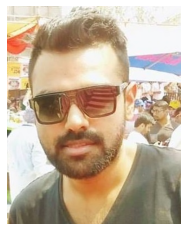

In [45]:
for img_file in lots_faces:
    img = cv.imread(img_file)
    plt.axis('off')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()